<a href="https://colab.research.google.com/github/prachi-lad17/Python-Case-Studies/blob/main/Case_Study_2%3A%20Figuring_out_which_customer_may_leave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Figuring out which customer may leave**

# Figuring Our Which Customers May Leave - Churn Analysis

### About our Dataset
Source - https://www.kaggle.com/blastchar/telco-customer-churn
1. We have customer information for a Telecommunications company
2. We've got customer IDs, general customer info, the servies they've subscribed too, type of contract and monthly charges.
3. This is a historic customer information so we have a field stating whether that customer has **churnded** 
**Field Descriptions**
- customerID - Customer ID
- gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

***Customer Churn*** - churn is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.

**Aim -** is to figure our which customers may likely churn in future

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [ ]:
## Loading files

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
churn_df = pd.read_csv(file_name)

# Using .head() function to check if file is uploaded. It will print first 5 records.
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
## To check last 5 records, we use .tail() funtion

churn_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
## To get summary on numeric columns

churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
## To get summary on each column

churn_df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,8808-ELEHO,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
## TO check categorical variables in dataset

churn_df.select_dtypes(exclude=['int64','float']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
## To check numerical variables

churn_df.select_dtypes(exclude=['object']).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [ ]:
## To check the unique values 

churn_df.SeniorCitizen.unique()

array([0, 1])

In [ ]:
## To check unique levels of tenure

churn_df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [ ]:
## Printing unique levels of Churn variable

churn_df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
## How many unique values are there in MonthlyChaerges variable

len(churn_df.MonthlyCharges.unique())

1585

In [ ]:
## How many unique values are there in Churn variable

len(churn_df.Churn.unique())

2

In [ ]:
## Another way of showing information of data in a single output

print("No_of_Rows: ", churn_df.shape[0])
print()
print("No_of_Columns: ", churn_df.shape[1])
print()
print("Features: ", churn_df.columns.to_list)
print("\nMissing_Values: ", churn_df.isnull().sum().values.sum())
print("\nMissing_Values: ", churn_df.isnull().sum())
print("\nUnique_Values: \n", churn_df.nunique())


No_of_Rows:  7043

No_of_Columns:  21

Features:  <bound method IndexOpsMixin.tolist of Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')>

Missing_Values:  0

Missing_Values:  customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique_Values: 


In [ ]:
## Print how many churn and not churn 

churn_df['Churn'].value_counts(sort = False)

No     5174
Yes    1869
Name: Churn, dtype: int64

## **Exporatory Data Analysis**

In [ ]:
## It is a best practice to keep a copy, in case we need to check at original dataset in future

churn_df_copy = churn_df.copy()

In [ ]:
## Dropping the columns which are not necessary for the plots we are gonna do.

churn_df_copy.drop(['customerID','MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)
churn_df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


### **pd.crosstab() == if we want to work upon more variable at a time then we use pd.crosstab()**
* The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear.
* The crosstab function can operate on numpy arrays, series or columns in a dataframe. 
* Pandas does that work behind the scenes to count how many occurrences there are of each combination.
* The pandas crosstab function is a useful tool for summarizing data. The functionality overlaps with some of the other pandas tools but it occupies a useful place in your data analysis toolbox. 

In [ ]:
## By using this code we can apply crosstab function for each column

summary = pd.concat([pd.crosstab(churn_df_copy[x], churn_df_copy.Churn) for x in churn_df_copy.columns[:-1]], keys=churn_df_copy.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [ ]:
## Printing churn rate by gender

pd.crosstab(churn_df_copy['Churn'],churn_df_copy['gender'])

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


In [ ]:
## Printing churn rate by gender with margins

pd.crosstab(churn_df_copy['Churn'],churn_df_copy['gender'],margins=True,margins_name="Total",normalize=True)

gender,Female,Male,Total
Churn,,,
No,0.361920,0.372710,0.73463
Yes,0.133324,0.132046,0.26537
Total,0.495244,0.504756,1.00000


In [ ]:
## Checking margins

pd.concat([pd.crosstab(churn_df_copy[x], churn_df_copy.Churn,margins=True,margins_name="Total",normalize=True) for x in churn_df_copy.columns[:-1]], keys=churn_df_copy.columns[:-1])


Churn                                             No       Yes     Total
gender           Female                     0.361920  0.133324  0.495244
                 Male                       0.372710  0.132046  0.504756
                 Total                      0.734630  0.265370  1.000000
SeniorCitizen    0                          0.640068  0.197785  0.837853
                 1                          0.094562  0.067585  0.162147
                 Total                      0.734630  0.265370  1.000000
Partner          No                         0.346585  0.170382  0.516967
                 Yes                        0.388045  0.094988  0.483033
                 Total                      0.734630  0.265370  1.000000
Dependents       No                         0.481329  0.219083  0.700412
                 Yes                        0.253301  0.046287  0.299588
                 Total                      0.734630  0.265370  1.000000
PhoneService     No                         0.072696  0.024137  0.096834
                 Yes                        0.661934  0.241232  0.903166
                 Total                      0.734630  0.265370  1.000000
MultipleLines    No                         0.360784  0.120545  0.481329
                 No phone service           0.072696  0.024137  0.096834
                 Yes                        0.301150  0.120687  0.421837
                 Total                      0.734630  0.265370  1.000000
InternetService  DSL                        0.278574  0.065171  0.343746
                 Fiber optic                0.255431  0.184154  0.439585
                 No                         0.200625  0.016044  0.216669
                 Total                      0.734630  0.265370  1.000000
OnlineSecurity   No                         0.289223  0.207440  0.496663
                 No internet service        0.200625  0.016044  0.216669
                 Yes                        0.244782  0.041886  0.286668
                 Total                      0.734630  0.265370  1.000000
OnlineBackup     No                         0.263382  0.175067  0.438450
                 No internet service        0.200625  0.016044  0.216669
                 Yes                        0.270623  0.074258  0.344881
                 Total                      0.734630  0.265370  1.000000
DeviceProtection No                         0.267500  0.171944  0.439443
                 No internet service        0.200625  0.016044  0.216669
                 Yes                        0.266506  0.077382  0.343888
                 Total                      0.734630  0.265370  1.000000
TechSupport      No                         0.287803  0.205310  0.493114
                 No internet service        0.200625  0.016044  0.216669
                 Yes                        0.246202  0.044015  0.290217
                 Total                      0.734630  0.265370  1.000000
StreamingTV      No                         0.265228  0.133750  0.398978
                 No internet service        0.200625  0.016044  0.216669
                 Yes                        0.268778  0.115576  0.384353
                 Total                      0.734630  0.265370  1.000000
StreamingMovies  No                         0.262246  0.133182  0.395428
                 No internet service        0.200625  0.016044  0.216669
                 Yes                        0.271759  0.116144  0.387903
                 Total                      0.734630  0.265370  1.000000
Contract         Month-to-month             0.315207  0.234985  0.550192
                 One year                   0.185574  0.023570  0.209144
                 Two year                   0.233849  0.006815  0.240664
                 Total                      0.734630  0.265370  1.000000
PaperlessBilling No                         0.341190  0.066591  0.407781
                 Yes                        0.393440  0.198779  0.592219
                 Total                      0.734630  0.26

In [ ]:
"""Making a % column for summary"""

summary['Churn_%'] = summary['Yes'] / summary['No'] + summary['Yes']


In [ ]:
summary

Churn                                         No   Yes      Churn_%
gender           Female                     2549   939   939.368380
                 Male                       2625   930   930.354286
SeniorCitizen    0                          4508  1393  1393.309006
                 1                           666   476   476.714715
Partner          No                         2441  1200  1200.491602
                 Yes                        2733   669   669.244786
Dependents       No                         3390  1543  1543.455162
                 Yes                        1784   326   326.182735
PhoneService     No                          512   170   170.332031
                 Yes                        4662  1699  1699.364436
MultipleLines    No                         2541   849   849.334120
                 No phone service            512   170   170.332031
                 Yes                        2121   850   850.400754
InternetService  DSL                        1962   459   459.233945
                 Fiber optic                1799  1297  1297.720956
                 No                         1413   113   113.079972
OnlineSecurity   No                         2037  1461  1461.717231
                 No internet service        1413   113   113.079972
                 Yes                        1724   295   295.171114
OnlineBackup     No                         1855  1233  1233.664690
                 No internet service        1413   113   113.079972
                 Yes                        1906   523   523.274397
DeviceProtection No                         1884  1211  1211.642781
                 No internet service        1413   113   113.079972
                 Yes                        1877   545   545.290357
TechSupport      No                         2027  1446  1446.713370
                 No internet service        1413   113   113.079972
                 Yes                        1734   310   310.178777
StreamingTV      No                         1868   942   942.504283
                 No internet service        1413   113   113.079972
                 Yes                        1893   814   814.430005
StreamingMovies  No                         1847   938   938.507851
                 No internet service        1413   113   113.079972
                 Yes                        1914   818   818.427377
Contract         Month-to-month             2220  1655  1655.745495
                 One year                   1307   166   166.127008
                 Two year                   1647    48    48.029144
PaperlessBilling No                         2403   469   469.195173
                 Yes                        2771  1400  1400.505233
PaymentMethod    Bank transfer (automatic)  1286   258   258.200622
                 Credit card (automatic)    1290   232   232.179845
                 Electronic check           1294  1071  1071.827666
                 Mailed check               1304   308   308.236196

## **Visualization and EDA**

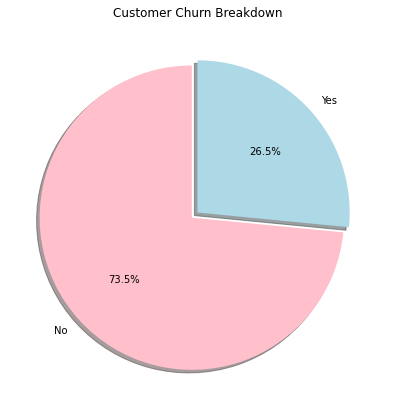

In [ ]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from pylab import rcParams # Customize Matplotlib plots using rcParams

# Data to plot
labels = churn_df['Churn'].value_counts(sort = True).index
sizes = churn_df['Churn'].value_counts(sort = True)

colors = ["pink","lightblue"]
explode = (0.05,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

No handles with labels found to put in legend.


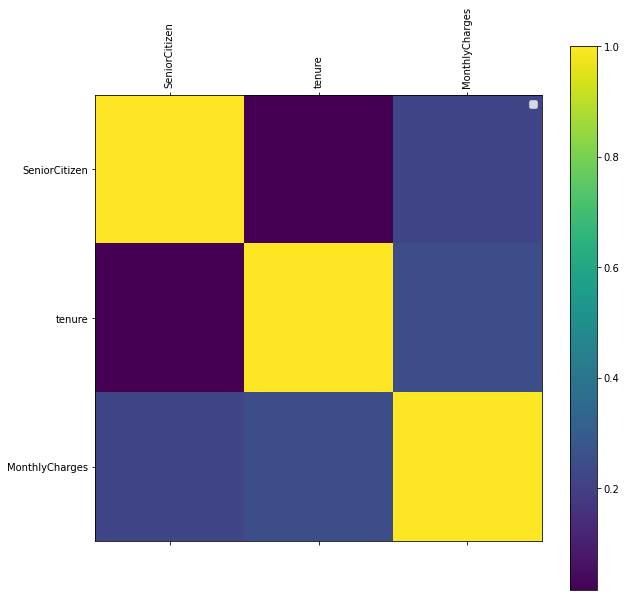

In [ ]:
# Correlation plot doesn't end up being too informative
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(churn_df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


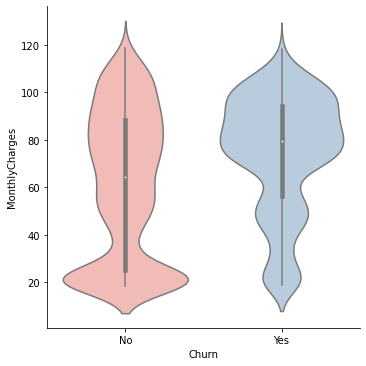

In [ ]:
# Create a Violin Plot showing how monthy charges relate to Churn
# We an see that Churned customers tend to be higher paying customers
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = churn_df, kind="violin", palette = "Pastel1")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


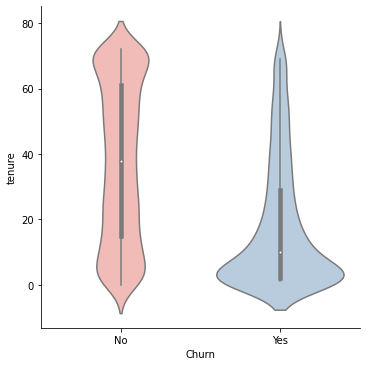

In [ ]:
# Let's look at Tenure
g = sns.factorplot(x="Churn", y = "tenure",data = churn_df, kind="violin", palette = "Pastel1")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


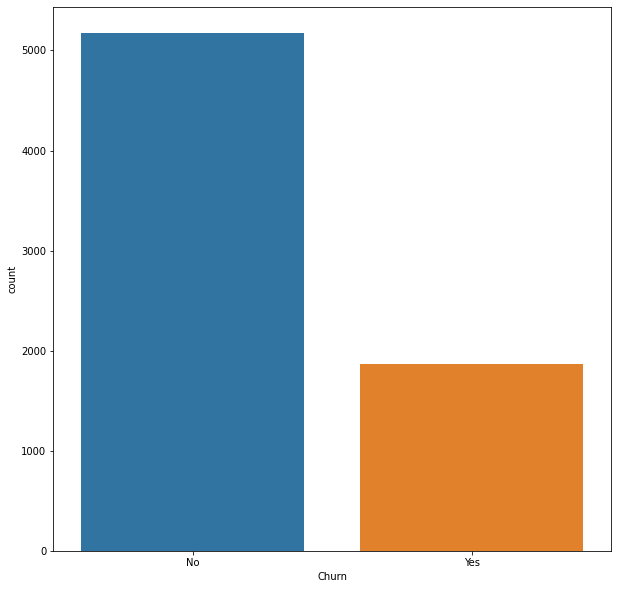

In [ ]:
plt.figure(figsize= (10,10))

sns.countplot(churn_df['Churn'])

## **Preparing our dataset for Machine Learning**

In [ ]:
# Check for empty fields, Note, " " is not Null but a spaced character
len(churn_df[churn_df['TotalCharges'] == " "])

11

In [ ]:
## Drop missing data
churn_df = churn_df[churn_df['TotalCharges'] != " "]

In [ ]:
len(churn_df[churn_df['TotalCharges'] == " "])

0

In [ ]:
## Here we are making diff col - id_col, target_col, 
## Next we are writing a code to check the unique levels in each categorical variable and if it is <6 then it is applying label encoding.
## Label Encoding takes binary column and changes the values to 0 and 1. We do label encoding because our can only understand 0 and 1 language.
## cat_col - will store categorical variables which are having less than 6 unique levels
## id_col - stores customerID column
## target_col - stores Churn column
## num_cols - stores all the numerical columns except id_cols, target_cols, cat_col
## bin_cols - stores the binary variables
## multi_cols - stores the categorical columns which are not binary
## Then next we do label encoding for binary columns 
## And duplicating columns for multi value columns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
cat_cols = churn_df.nunique()[churn_df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in churn_df.columns if x not in cat_cols + target_col + id_col]

#Binary columns with 2 values
bin_cols = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    churn_df[i] = le.fit_transform(churn_df[i])
    
#Duplicating columns for multi value columns
churn_df = pd.get_dummies(data = churn_df, columns = multi_cols )
churn_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
len(churn_df.columns)

42

In [ ]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
id_col

['customerID']

In [ ]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
## Scaling Numerical columns
std = StandardScaler()

## Scale data
scaled = std.fit_transform(churn_df[num_cols])
scaled = pd.DataFrame(scaled,columns = num_cols)

## Dropping original values merging scaled values for numerical columns
df_telcom_og = churn_df.copy()
churn_df = churn_df.drop(columns = num_cols,axis = 1)
churn_df = churn_df.merge(scaled, left_index = True, right_index = True, how = "left")

## Churn_df.info()
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [ ]:
churn_df.drop(['customerID'], axis=1, inplace=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [ ]:
churn_df[churn_df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7032,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,NaN,NaN,NaN
7033,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,NaN,NaN,NaN
7034,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,NaN,NaN,NaN
7035,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,NaN,NaN,NaN
7036,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,NaN,NaN,NaN
7037,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,NaN,NaN,NaN
7038,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,NaN,NaN,NaN
7039,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,NaN,NaN,NaN
7040,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,NaN,NaN,NaN
7041,1,1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,NaN,NaN,NaN


In [ ]:
print(len(churn_df.isnull().sum()))

## Since there are only 11 NA values, we drop them.
churn_df = churn_df.dropna()

41


In [ ]:
# Double check that nulls have been removed
churn_df[churn_df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges


# **Splitting into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

# We remove our label values from train data
X = churn_df.drop(['Churn'],axis=1).values

# We assigned our label variable to test data
Y = churn_df['Churn'].values

In [ ]:
# Split it to a 70:30 Ratio Train:Test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
df_train = pd.DataFrame(x_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.042158,0.119725,0.745143
1,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.383881,0.352408,-0.282250
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.076528,0.955722,-0.770711
3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.612573,1.457653,2.401405
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.280248,0.157952,-0.976679


In [ ]:
print(len(churn_df.columns))
churn_df.columns

41


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

In [ ]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


# **Training LOGISTIC REGRESSION model**

In [ ]:
from sklearn.linear_model import LogisticRegression

### creating a model
classifier_model = LogisticRegression()

### passing training data to model
classifier_model.fit(x_train,y_train)

### predicting values x_test using model and storing the values in y_pred
y_pred = classifier_model.predict(x_test)

### interception and coefficient of model
print(classifier_model.intercept_)
print(classifier_model.coef_)
print()

### printing values for better understanding
print(list(zip(y_test, y_pred)))

[-2.11910504]
[[-0.05022296  0.10890392 -0.18712529 -0.12307329 -0.0778112   0.29320137
  -0.03704528  0.07705881 -0.04076592 -0.33917378  0.40866021 -0.07023882
   0.28841101 -0.07023882 -0.21892458  0.23978197 -0.07023882 -0.17029554
   0.13656142 -0.07023882 -0.06707499  0.24621309 -0.07023882 -0.17672667
  -0.03004989 -0.07023882  0.09953632 -0.03074416 -0.07023882  0.10023059
   1.12186249 -0.05343082 -1.06918406 -0.16237957 -0.28904181  0.35134817
   0.09932082 -0.07699484 -0.02107863  0.06105219]]

[(0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### creating and printing confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

### Creating and printing classification report
print("Classification Report: ")
print(classification_report(y_test,y_pred))


### Creating and printing accuracy score
acc = accuracy_score(y_test,y_pred)
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, y_test)))

[[1402  173]
 [ 251  281]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1575
           1       0.62      0.53      0.57       532

    accuracy                           0.80      2107
   macro avg       0.73      0.71      0.72      2107
weighted avg       0.79      0.80      0.79      2107

Accuracy 79.88%


## **Feature Importance using Logistic Regression**

In [ ]:
# Let's see what features mattered most i.e. Feature Importance
# We sort on the co-efficients with the largest weights as those impact the resulting output the most 
coef = classifier_model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.050222960549011764, 0.1089039205858832, 0.1871252894333899, 0.1230732924468994, 0.07781119570044545, 0.29320137472467045, 0.037045280047143136, 0.07705880654061269, 0.0407659156534038, 0.33917377899540474, 0.40866020747000087, 0.07023881763448242, 0.28841100533382286, 0.07023881763448242, 0.2189245768592332, 0.2397819717870356, 0.07023881763448242, 0.17029554331245636, 0.13656141740984568, 0.07023881763448242, 0.06707498893540183, 0.24621309435289046, 0.07023881763448242, 0.17672666587825425, 0.03004989390607606, 0.07023881763448242, 0.09953632238057783, 0.030744159099593188, 0.07023881763448242, 0.10023058757408397, 1.1218624897431093, 0.053430817121020865, 1.0691840617819615, 0.16237957425453414, 0.2890418058597216, 0.35134816886981945, 0.09932082208454392, 0.0769948353508674, 0.021078634016382956, 0.061052187383202255]


In [ ]:
# Finding and deleting the label column
cols = list(churn_df.columns)
cols.index('Churn')

6

In [ ]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [ ]:
# Sorting on Feature Importance
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Contract_Month-to-month
Contract_Two year
InternetService_Fiber optic
PaymentMethod_Electronic check
InternetService_DSL
PaperlessBilling
PaymentMethod_Credit card (automatic)
OnlineSecurity_No
TechSupport_No
OnlineBackup_No
OnlineSecurity_Yes
Partner
TechSupport_Yes
OnlineBackup_Yes
PaymentMethod_Bank transfer (automatic)
DeviceProtection_No
Dependents
SeniorCitizen
StreamingMovies_Yes
StreamingTV_Yes
PaymentMethod_Mailed check
PhoneService
MultipleLines_No phone service
tenure
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
DeviceProtection_Yes
TotalCharges
Contract_One year
gender
MultipleLines_Yes
MultipleLines_No
StreamingMovies_No
StreamingTV_No
MonthlyCharges


## **Try Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100,random_state=10) ## it will built 100 DT in background

#fit the model on the data and predict the values

random_forest_model.fit(x_train,y_train)

y_pred_rf = random_forest_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### creating and printing confusion matrix
conf_matrix_rf = confusion_matrix(y_test,y_pred_rf)
print(conf_matrix_rf)

### Creating and printing classification report
print("Classification Report: ")
print(classification_report(y_test,y_pred_rf))


### Creating and printing accuracy score
acc = accuracy_score(y_test,y_pred_rf)
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred_rf, y_test)))

[[1383  192]
 [ 284  248]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1575
           1       0.56      0.47      0.51       532

    accuracy                           0.77      2107
   macro avg       0.70      0.67      0.68      2107
weighted avg       0.76      0.77      0.77      2107

Accuracy 77.41%


# **Saving a model**

In [ ]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(random_forest_model, f)

# load
with open('model.pkl', 'rb') as f:
    loaded_model_rf = pickle.load(f)

In [ ]:
predictions = loaded_model_rf.predict(x_test)

In [ ]:
predictions

array([1, 0, 0, ..., 1, 0, 0])

# **Deep Learning Model**

In [ ]:
## Using the newest version of Tensorflow 2.0
%tensorflow_version 2.x


In [ ]:
## Checking to ensure we are using our GPU
import tensorflow as tf

tf.test.gpu_device_name()

''

In [ ]:
# Create a simple model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(20, kernel_initializer = "uniform",activation = "relu", input_dim=40))
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Start Training Our Classifier 

batch_size = 64
epochs = 25

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
77/77 [==============================] - 1s 8ms/step - loss: 0.6719 - accuracy: 0.6372 - val_loss: 0.5446 - val_accuracy: 0.7475
Epoch 2/25
77/77 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7428 - val_loss: 0.4530 - val_accuracy: 0.7893
Epoch 3/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7829 - val_loss: 0.4361 - val_accuracy: 0.7940
Epoch 4/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7741 - val_loss: 0.4348 - val_accuracy: 0.7959
Epoch 5/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.7737 - val_loss: 0.4302 - val_accuracy: 0.7969
Epoch 6/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7770 - val_loss: 0.4323 - val_accuracy: 0.7945
Epoch 7/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.7831 - val_loss: 0.4290 - val_accuracy: 0.7969
Epoch 8/25
77/77 [==

In [ ]:
predictions = model.predict(x_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1344  231]
 [ 210  322]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1575
           1       0.58      0.61      0.59       532

    accuracy                           0.79      2107
   macro avg       0.72      0.73      0.73      2107
weighted avg       0.79      0.79      0.79      2107



# **Saving Model**

In [ ]:
## Simple cnn = simple convolutional neural network 
## You mean a HDF5/H5 file, which is a file format to store structured data, its not a model by itself. 
## Keras saves models in this format as it can easily store the weights and model configuration in a single file.

model.save("simple_cnn_25_epochs.h5")

In [ ]:
## Loading our model

from tensorflow.keras.models import load_model

classifier_DL_simple_cnn = load_model('simple_cnn_25_epochs.h5')

# **Trying deeper models, checkpoints and stopping early.**

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(2000, activation='relu', input_dim=40, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(1000, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 3
model2.add(Dense(500, activation = 'relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

# Create our checkpoint so that we save model after each epoch
checkpoint = ModelCheckpoint("deep_model_checkpoint.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2000)              82000     
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Defining our early stoppping criteria
from tensorflow.keras.callbacks import EarlyStopping 

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 2, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [ ]:
batch_size = 32
epochs = 10

history = model2.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    # NOTE We are adding our callbacks here
                    callbacks = callbacks,
                    validation_data = (x_test, y_test))

score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
154/154 [==============================] - 7s 43ms/step - loss: 6.8737 - accuracy: 0.7394 - val_loss: 0.5070 - val_accuracy: 0.7765

Epoch 00001: val_loss improved from inf to 0.50703, saving model to deep_model_checkpoint.h5
Epoch 2/10
154/154 [==============================] - 6s 42ms/step - loss: 0.5099 - accuracy: 0.7636 - val_loss: 0.4795 - val_accuracy: 0.7916

Epoch 00002: val_loss improved from 0.50703 to 0.47948, saving model to deep_model_checkpoint.h5
Epoch 3/10
154/154 [==============================] - 7s 42ms/step - loss: 0.5003 - accuracy: 0.7703 - val_loss: 0.4742 - val_accuracy: 0.7864

Epoch 00003: val_loss improved from 0.47948 to 0.47419, saving model to deep_model_checkpoint.h5
Epoch 4/10
154/154 [==============================] - 7s 43ms/step - loss: 0.4855 - accuracy: 0.7844 - val_loss: 0.4698 - val_accuracy: 0.7940

Epoch 00004: val_loss improved from 0.47419 to 0.46982, saving model to deep_model_checkpoint.h5
Epoch 5/10
154/154 [====================